In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('/content/Loan Dataset.xlsx')

In [3]:
df

,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,3509.4,1,0,0,1,0,5849,0.0,360,1,1
1,128.0,1,1,1,1,0,4583,1508.0,360,1,3
2,66.0,1,1,0,1,1,3000,0.0,360,1,1
3,120.0,1,1,0,2,0,2583,2358.0,360,1,1
4,141.0,1,0,0,1,0,6000,0.0,360,1,1
...,...,...,...,...,...,...,...,...,...,...,...
559,71.0,2,0,0,1,0,2900,0.0,360,1,3
560,40.0,1,1,3,1,0,4106,0.0,180,1,3
561,253.0,1,1,1,1,0,8072,240.0,360,1,1
562,187.0,1,1,2,1,0,7583,0.0,360,1,1


In [4]:
df.describe()

,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,262.075532,1.200355,0.643617,0.755319,1.214539,0.148936,5466.436170,1530.448440,342.595745,0.842199,1.969858
std,818.638819,0.400621,0.479355,1.016938,0.410867,0.356342,6271.344106,2471.721359,63.838715,0.364878,0.784494
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,150.000000,0.000000,36.000000,0.000000,1.000000
25%,100.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2892.750000,0.000000,360.000000,1.000000,1.000000
50%,128.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3815.000000,1105.500000,360.000000,1.000000,2.000000
75%,172.250000,1.000000,1.000000,2.000000,1.000000,0.000000,5803.750000,2250.000000,360.000000,1.000000,3.000000
max,12400.200000,2.000000,1.000000,3.000000,2.000000,1.000000,81000.000000,33837.000000,480.000000,1.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoanAmount         564 non-null    float64
 1   Gender             564 non-null    int64  
 2   Married            564 non-null    int64  
 3   Dependents         564 non-null    int64  
 4   Education          564 non-null    int64  
 5   Self_Employed      564 non-null    int64  
 6   ApplicantIncome    564 non-null    int64  
 7   CoapplicantIncome  564 non-null    float64
 8   Loan_Amount_Term   564 non-null    int64  
 9   Credit_History     564 non-null    int64  
 10  Property_Area      564 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 48.6 KB


In [6]:
# Check for null values in each column
print(df.isnull().sum())


LoanAmount           0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [8]:
df.duplicated().sum()

np.int64(0)

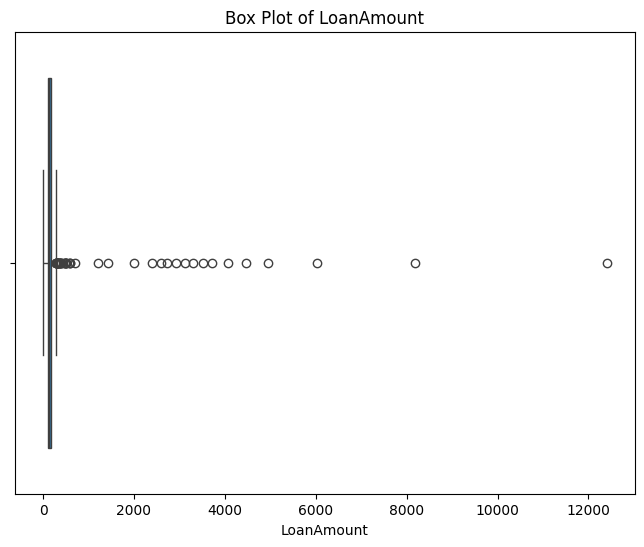

--------------------


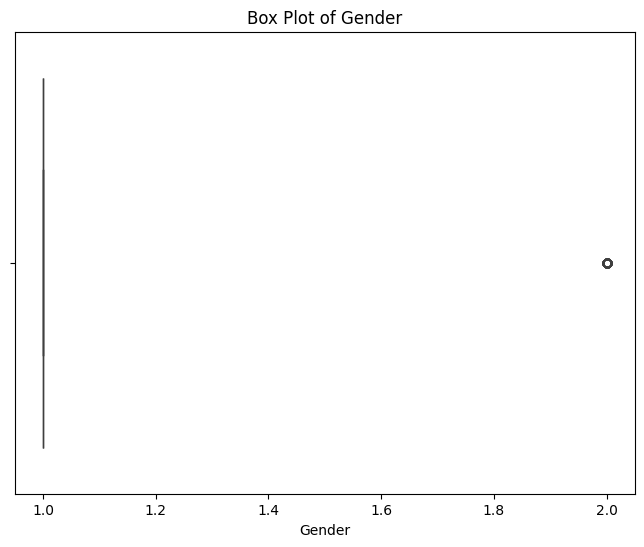

--------------------


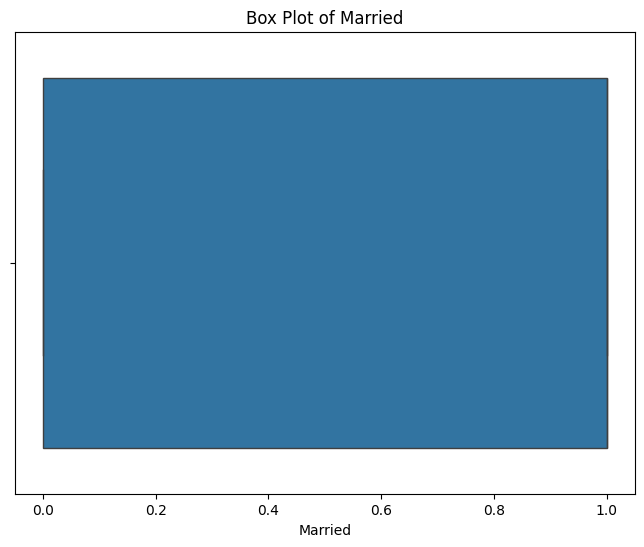

--------------------


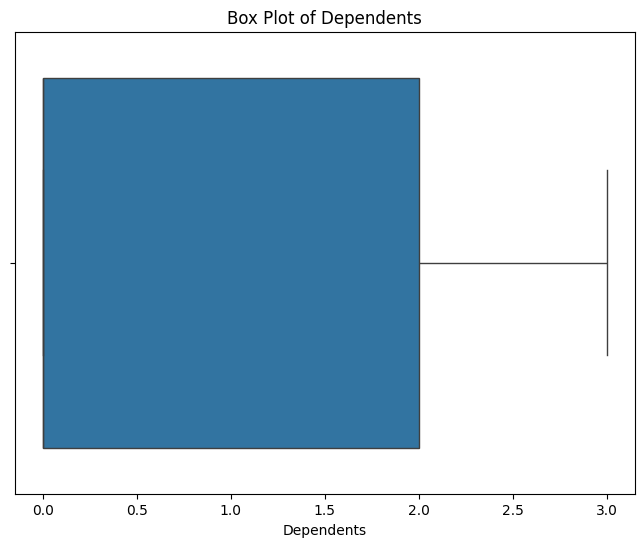

--------------------


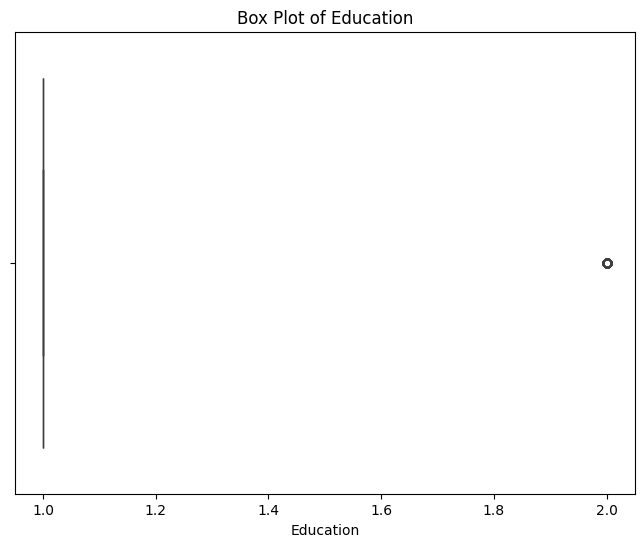

--------------------


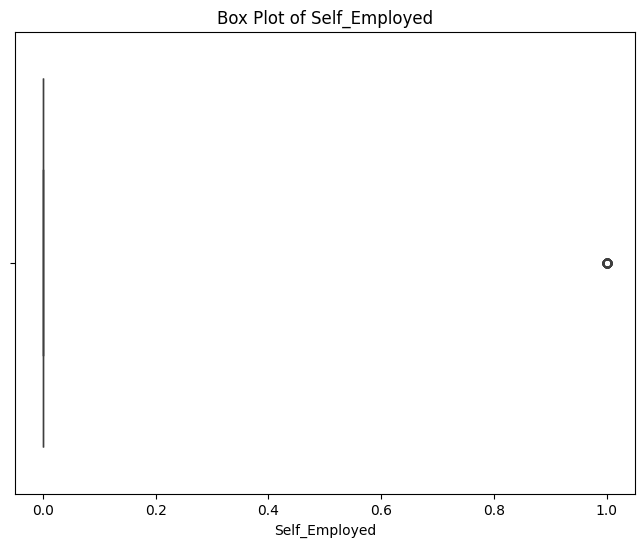

--------------------


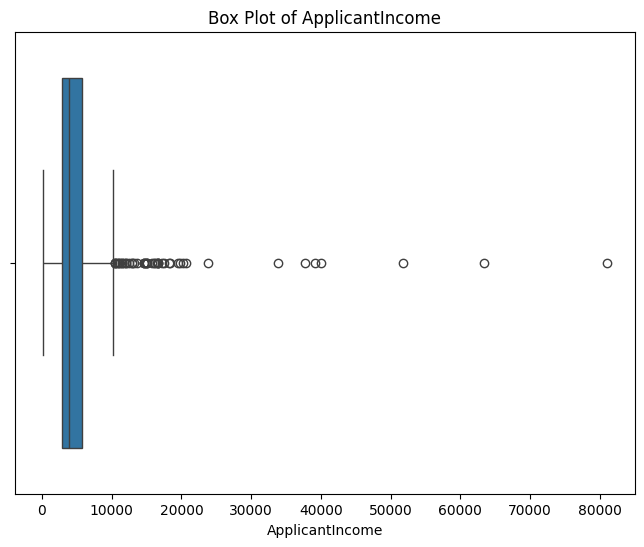

--------------------


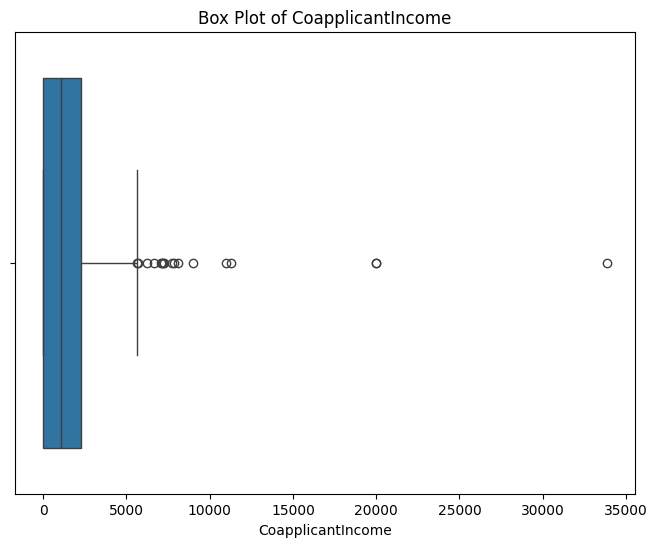

--------------------


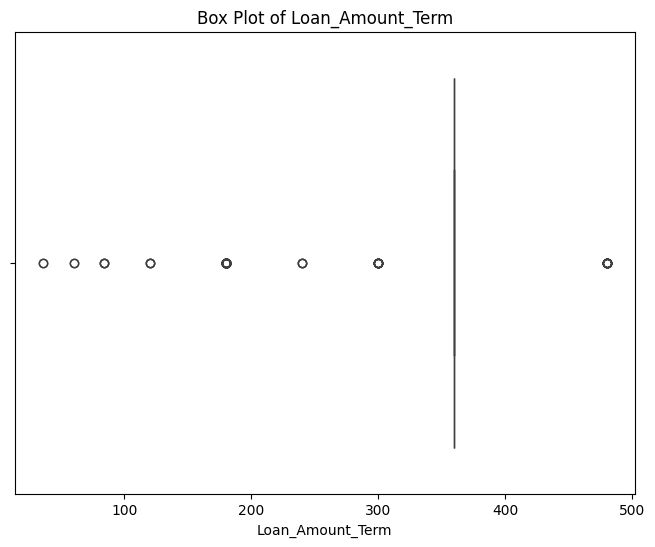

--------------------


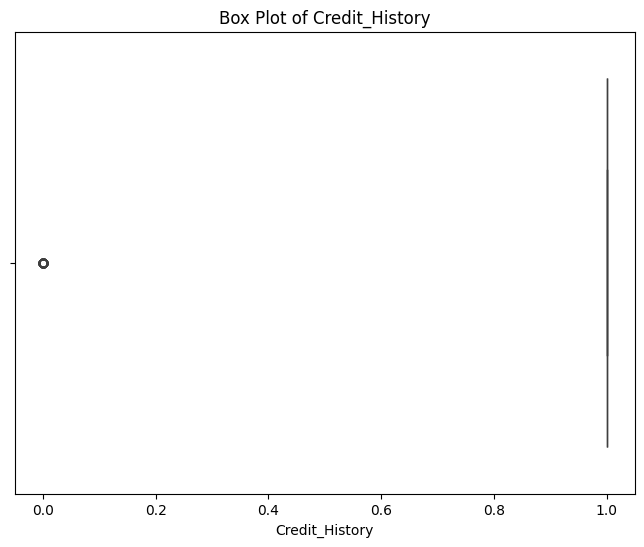

--------------------


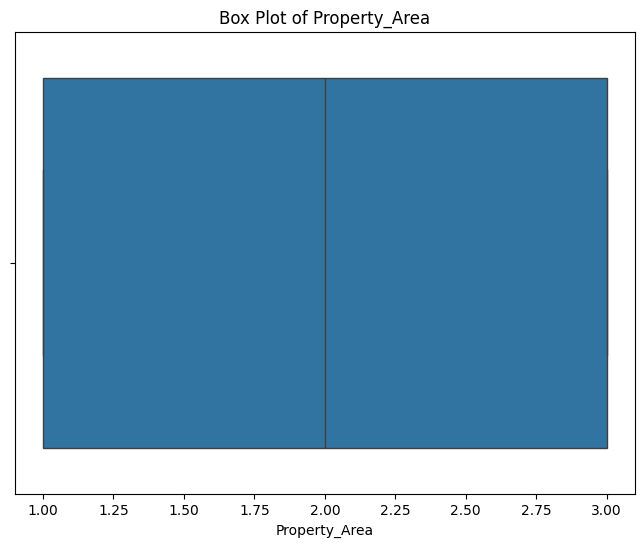

--------------------


In [9]:
# checking for outliers and plot them in box plots

# Select numerical columns for outlier detection and box plot
numerical_cols = df.select_dtypes(include=['number']).columns

# Loop through each numerical column and create a box plot
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Box Plot of {col}')
  plt.show()

  # Identify outliers (using IQR method, adjust thresholds as needed)
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  # print(f"Outliers in {col}:\n{outliers[col]}")

  print("-" * 20)


In [10]:
df.corr()

,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
LoanAmount,1.000000,-0.022783,0.025722,-0.016634,-0.026304,-0.017029,0.133061,-0.014687,-0.018568,0.064540,0.002245
Gender,-0.022783,1.000000,-0.339708,-0.154122,-0.056576,0.014560,0.000250,-0.154282,0.074081,-0.026349,-0.020312
Married,0.025722,-0.339708,1.000000,0.360065,0.010122,0.030532,0.055468,0.124217,-0.106234,0.002863,-0.014446
Dependents,-0.016634,-0.154122,0.360065,1.000000,0.032335,0.051727,0.131680,-0.014142,-0.093948,-0.037225,-0.007035
Education,-0.026304,-0.056576,0.010122,0.032335,1.000000,0.060401,-0.142372,-0.054520,-0.086550,-0.081822,0.058673
Self_Employed,-0.017029,0.014560,0.030532,0.051727,0.060401,1.000000,0.109951,0.005887,-0.021710,0.003488,0.066918
ApplicantIncome,0.133061,0.000250,0.055468,0.131680,-0.142372,0.109951,1.000000,-0.126174,-0.061693,-0.014715,0.015892
CoapplicantIncome,-0.014687,-0.154282,0.124217,-0.014142,-0.054520,0.005887,-0.126174,1.000000,-0.000967,-0.002056,0.012529
Loan_Amount_Term,-0.018568,0.074081,-0.106234,-0.093948,-0.086550,-0.021710,-0.061693,-0.000967,1.000000,-0.003735,0.076754
Credit_History,0.064540,-0.026349,0.002863,-0.037225,-0.081822,0.003488,-0.014715,-0.002056,-0.003735,1.000000,0.001969


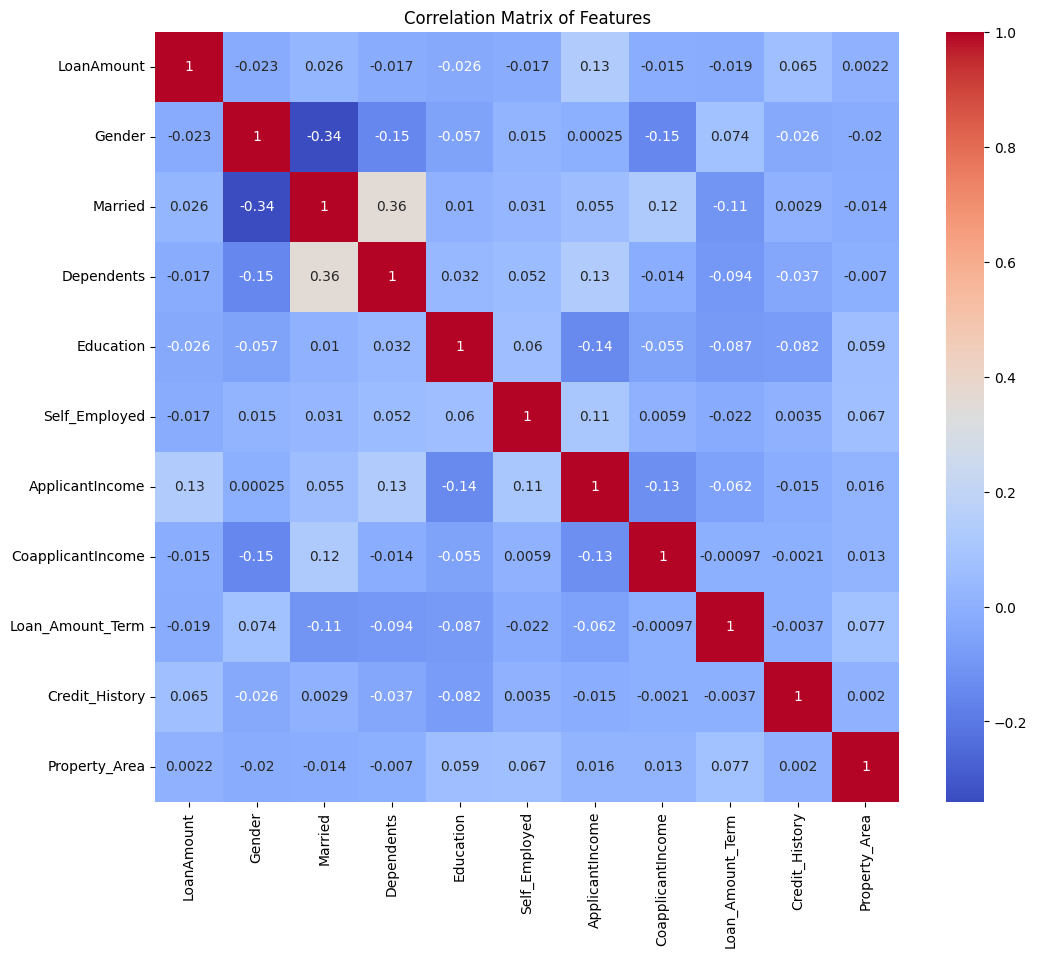

In [12]:
# Draw correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

In [11]:
# define x and y variable, y is loan amount

x = df.drop('LoanAmount', axis=1)
y = df['LoanAmount']


             feature        VIF
0             Gender   9.209597
1            Married   3.309077
2         Dependents   1.819873
3          Education   8.148460
4      Self_Employed   1.204251
5    ApplicantIncome   1.829726
6  CoapplicantIncome   1.433670
7   Loan_Amount_Term  17.677040
8     Credit_History   5.728139
9      Property_Area   7.072644

Features with high VIF (>5): ['Gender', 'Education', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']


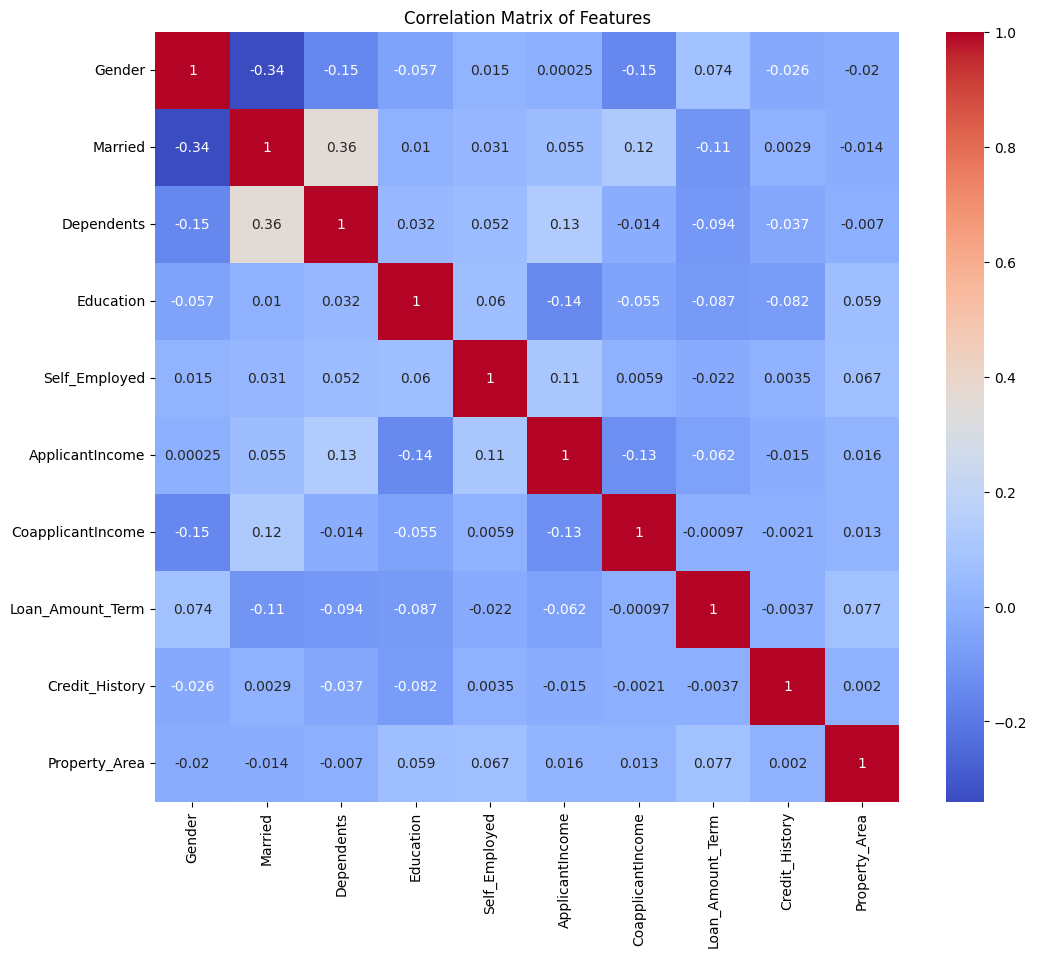

In [13]:
# check multicolinearity in x variable also vif

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature in x
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

# Display VIF values
print(vif_data)

# Identify features with high multicollinearity (VIF > 5 or 10)
high_vif_features = vif_data[vif_data["VIF"] > 5]["feature"].tolist()
print(f"\nFeatures with high VIF (>5): {high_vif_features}")


# Correlation matrix heatmap (optional)
plt.figure(figsize=(12, 10))
sns.heatmap(x.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


In [14]:
# extracting regression model of x and y and display p values

import statsmodels.api as sm

x = sm.add_constant(x)    # Add a constant to the independent variables

model = sm.OLS(y, x).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             LoanAmount   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.450
Date:                Mon, 15 Sep 2025   Prob (F-statistic):              0.155
Time:                        17:03:56   Log-Likelihood:                -4575.6
No. Observations:                 564   AIC:                             9173.
Df Residuals:                     553   BIC:                             9221.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               133.5123    296.61

In [15]:
# drop insignificant x variables from the model step by step

# Iterate through features with high VIF and remove one by one
for feature in high_vif_features:
    print(f"\nDropping feature: {feature}")
    x = x.drop(feature, axis=1)

    # Recalculate VIF after dropping the feature
    vif_data = pd.DataFrame()
    vif_data["feature"] = x.columns
    vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
    print(vif_data)

    # Refit the model and print summary
    model = sm.OLS(y, x).fit()
    print(model.summary())

    # Update the list of features with high VIF
    high_vif_features = vif_data[vif_data["VIF"] > 5]["feature"].tolist()
    if not high_vif_features:
        print("\nNo more features with high VIF.")
        break




Dropping feature: Gender
             feature        VIF
0              const  59.362435
1            Married   1.179909
2         Dependents   1.176299
3          Education   1.056683
4      Self_Employed   1.024325
5    ApplicantIncome   1.080857
6  CoapplicantIncome   1.043823
7   Loan_Amount_Term   1.033852
8     Credit_History   1.009363
9      Property_Area   1.015760
                            OLS Regression Results                            
Dep. Variable:             LoanAmount   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.596
Date:                Mon, 15 Sep 2025   Prob (F-statistic):              0.113
Time:                        17:13:19   Log-Likelihood:                -4575.7
No. Observations:                 564   AIC:                             9171.
Df Residuals:                     554   BIC:                         

In [16]:
# drop all columns except applicant income from x variable

x = x[['ApplicantIncome']]


In [17]:
# extract regression model

import statsmodels.api as sm

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

print(model.summary())

# Accessing model coefficients
coefficients = model.params
print("\nCoefficients:\n", coefficients)

# Accessing R-squared value
r_squared = model.rsquared
print("\nR-squared:", r_squared)

# Accessing other relevant statistics
# ... (add other statistics you want to extract)


                            OLS Regression Results                            
Dep. Variable:             LoanAmount   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     10.13
Date:                Mon, 15 Sep 2025   Prob (F-statistic):            0.00154
Time:                        17:15:38   Log-Likelihood:                -4577.9
No. Observations:                 564   AIC:                             9160.
Df Residuals:                     562   BIC:                             9168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             167.1272     45.379     

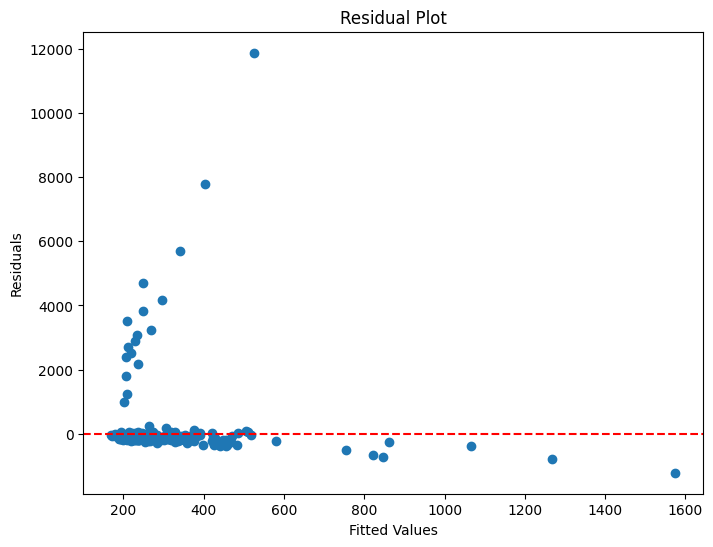


Breusch-Pagan test results:
{'Lagrange multiplier statistic': np.float64(7.9755476017645694), 'p-value': np.float64(0.004741341131794142), 'f-value': np.float64(8.061260134979472), 'f p-value': np.float64(0.004685794739819173)}

The null hypothesis of homoscedasticity is rejected.
There is evidence of heteroscedasticity in the residuals.


In [18]:
# check for homoscadacity and plot residuals

import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'x' and 'model' are defined from the previous code

# Get the residuals
residuals = model.resid

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

# Test for homoscedasticity using Breusch-Pagan test
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals, model.model.exog)
print("\nBreusch-Pagan test results:")
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))


# Interpret the results
alpha = 0.05
if bp_test[1] < alpha:
    print("\nThe null hypothesis of homoscedasticity is rejected.")
    print("There is evidence of heteroscedasticity in the residuals.")
else:
    print("\nThe null hypothesis of homoscedasticity is not rejected.")
    print("There is no significant evidence of heteroscedasticity.")


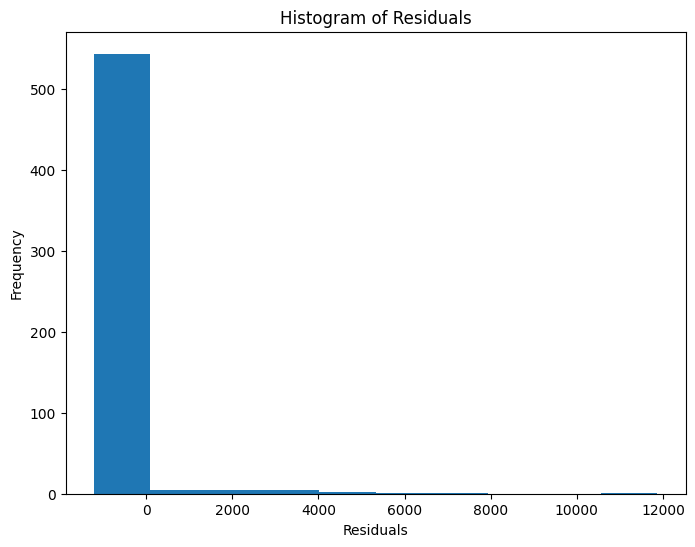

In [19]:
# prompt: plot residuals in a histogram in a line

import matplotlib.pyplot as plt

# Assuming 'residuals' is already defined from the previous code
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=10)  # Adjust the number of bins as needed
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()


### **Multiple Linear Regression with this dataset did not yield a strong predictive model (R² < 3%). ApplicantIncome has a statistically significant but weak effect on LoanAmount. Model suffers from multicollinearity, non-normal residuals, and outliers, hence is not robust. Further data preprocessing or alternative models are required.**